In [2]:
import os,sys
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_gbq
import matplotlib.pyplot as plt
#definir rutas de los directorios
from pathlib import Path
current_dir = Path('.')
proyect_dir = Path(current_dir).parent

In [3]:
# Poner en la terminal
# pip install pandas-gbq

query = """
SELECT
 * 
FROM 
  `bigquery-public-data.chicago_taxi_trips.taxi_trips` 
LIMIT 1000
"""

df = pd.read_gbq(query)
df.head()

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,6bec6749257f01467364e811bfb795f26d6da4d8,7eb2acea20efa3d574fd474bdb580a08d52fe64b5427b9...,2016-07-15 07:45:00+00:00,2016-07-15 07:45:00+00:00,9,6.2,<NA>,<NA>,<NA>,<NA>,...,0.0,4.75,Cash,Chicago Carriage Cab Corp,NaN,NaN,None,NaN,NaN,None
1,3bd17464468b1a35d5fc48c5182312ce210d619f,7eb2acea20efa3d574fd474bdb580a08d52fe64b5427b9...,2016-07-15 07:45:00+00:00,2016-07-15 08:00:00+00:00,583,20.0,<NA>,<NA>,<NA>,<NA>,...,0.0,9.00,Cash,Chicago Carriage Cab Corp,NaN,NaN,None,NaN,NaN,None
2,680003b74510e445a0bbd2ef200db1b5b5ef6fda,7eb2acea20efa3d574fd474bdb580a08d52fe64b5427b9...,2016-07-15 08:00:00+00:00,2016-07-15 08:15:00+00:00,827,16.3,<NA>,<NA>,<NA>,<NA>,...,1.0,10.25,Cash,Chicago Carriage Cab Corp,NaN,NaN,None,NaN,NaN,None
3,58d5e880c734e0456f7aeedbf21d361f67f149fc,d88f9f3572dfe994e44934efecc09872c199c4850c807a...,2016-07-13 16:00:00+00:00,2016-07-13 16:30:00+00:00,1076,30.5,<NA>,<NA>,<NA>,<NA>,...,1.0,13.50,Cash,Chicago Carriage Cab Corp,NaN,NaN,None,NaN,NaN,None
4,74d63fea7e4c3568dc80cafb6b90b49fa7dfa849,d88f9f3572dfe994e44934efecc09872c199c4850c807a...,2016-07-13 16:30:00+00:00,2016-07-13 16:30:00+00:00,7,20.7,<NA>,<NA>,<NA>,<NA>,...,1.0,10.75,Cash,Chicago Carriage Cab Corp,NaN,NaN,None,NaN,NaN,None


In [4]:
# get only numeric columns
numerics = ["int64", "int32", "int16", "float16", "float32", "float64"]

num_df = df.select_dtypes(include=numerics)
num_df.head()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,9,6.2,<NA>,<NA>,<NA>,<NA>,4.75,0.0,0.0,0.0,4.75,NaN,NaN,NaN,NaN
1,583,20.0,<NA>,<NA>,<NA>,<NA>,9.00,0.0,0.0,0.0,9.00,NaN,NaN,NaN,NaN
2,827,16.3,<NA>,<NA>,<NA>,<NA>,9.25,0.0,0.0,1.0,10.25,NaN,NaN,NaN,NaN
3,1076,30.5,<NA>,<NA>,<NA>,<NA>,12.50,0.0,0.0,1.0,13.50,NaN,NaN,NaN,NaN
4,7,20.7,<NA>,<NA>,<NA>,<NA>,9.75,0.0,0.0,1.0,10.75,NaN,NaN,NaN,NaN


In [5]:
num_df.describe()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,1000.000000,1000.000000,0,0,0,0,1000.00000,1000.000000,940.0,1000.000000,1000.000000,0.0,0.0,0.0,0.0
mean,844.150000,8.201690,<NA>,<NA>,<NA>,<NA>,13.29894,1.393220,0.0,1.069000,15.945160,NaN,NaN,NaN,NaN
std,1651.970391,21.931086,<NA>,<NA>,<NA>,<NA>,11.88719,2.601194,0.0,2.886879,15.055794,NaN,NaN,NaN,NaN
min,0.000000,0.000000,<NA>,<NA>,<NA>,<NA>,0.00000,0.000000,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,360.000000,1.060000,<NA>,<NA>,<NA>,<NA>,6.50000,0.000000,0.0,0.000000,7.500000,NaN,NaN,NaN,NaN
50%,600.000000,2.050000,<NA>,<NA>,<NA>,<NA>,8.50000,0.000000,0.0,0.000000,10.500000,NaN,NaN,NaN,NaN
75%,960.000000,7.212500,<NA>,<NA>,<NA>,<NA>,14.31250,2.000000,0.0,1.000000,16.050000,NaN,NaN,NaN,NaN
max,47700.000000,230.100000,<NA>,<NA>,<NA>,<NA>,70.25000,20.850000,0.0,45.000000,125.100000,NaN,NaN,NaN,NaN


In [17]:
#tomando las variables continuas
num_df = pd.DataFrame(num_df, columns=['trip_seconds', 'trip_miles', 'fare','tips','extras','trip_total'])
num_df.head()

,trip_seconds,trip_miles,fare,tips,extras,trip_total
0,9,6.2,4.75,0.0,0.0,4.75
1,583,20.0,9.00,0.0,0.0,9.00
2,827,16.3,9.25,0.0,1.0,10.25
3,1076,30.5,12.50,0.0,1.0,13.50
4,7,20.7,9.75,0.0,1.0,10.75


<AxesSubplot:>

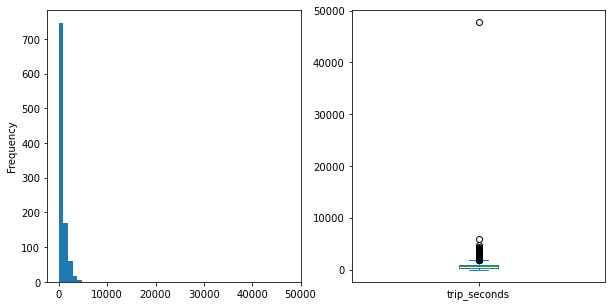

In [18]:
fig, ax = plt.subplots(ncols = 2, nrows=1, figsize=(10,5))
num_df['trip_seconds'].plot(kind='hist', bins=50, ax=ax[0])
num_df['trip_seconds'].plot(kind='box',          ax=ax[1])


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


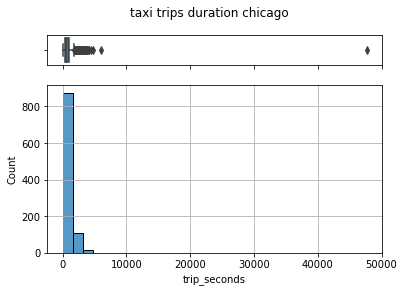

In [19]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df["trip_seconds"], ax=ax_box)
sns.histplot(data=num_df, x="trip_seconds", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('taxi trips duration chicago')
ax_hist.grid()


#plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-trip-duration-chicago')
#f.savefig(plot_path)

Log-Transform

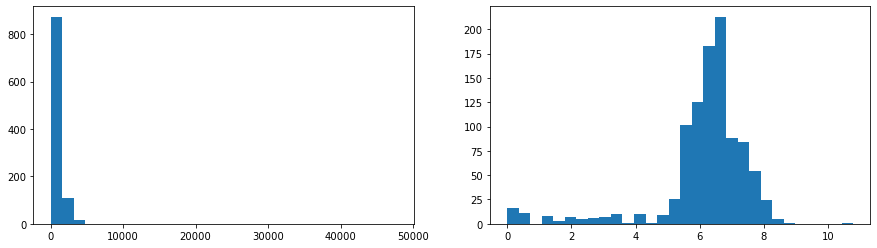

In [20]:
x=  num_df['trip_seconds']
log_x = np.log(x+1)

f, ax = plt.subplots(1,2, figsize=(15,4))

ax[0].hist(x,   bins =30)
ax[1].hist(log_x, bins=30);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='trip_seconds'>

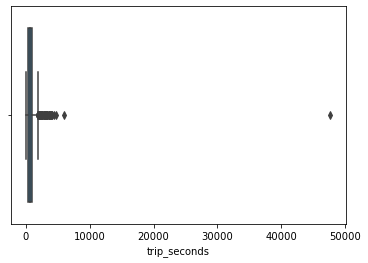

In [21]:
sns.boxplot(x)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

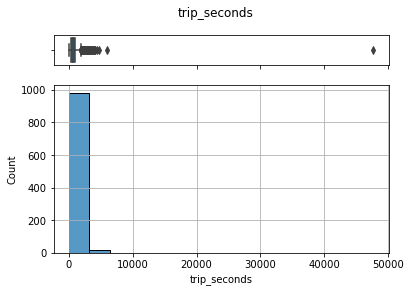

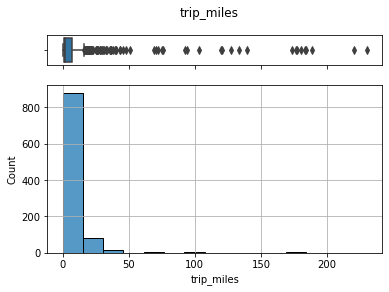

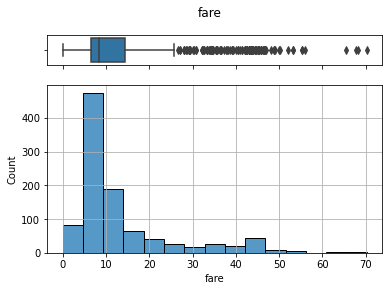

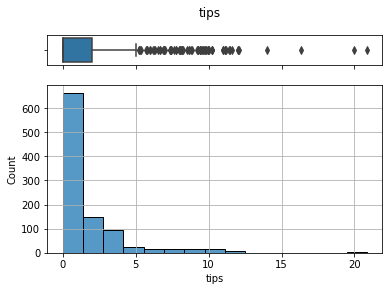

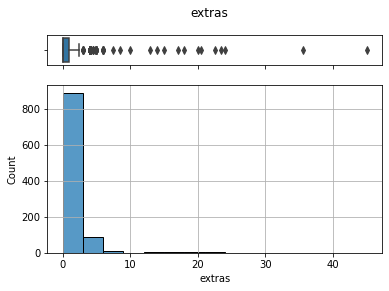

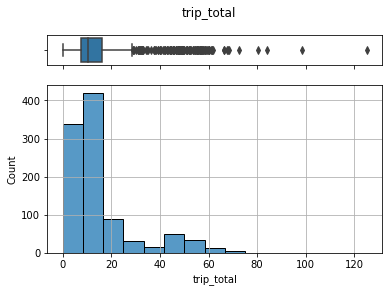

In [22]:
#graficando histograma de cada variable

for col in num_df:
    column="{}".format(col)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(num_df[column], ax=ax_box)
    sns.histplot(data=num_df, x=column, bins=15, ax=ax_hist)
    ax_box.set(xlabel='')
    plt.suptitle(column)
    ax_hist.grid()

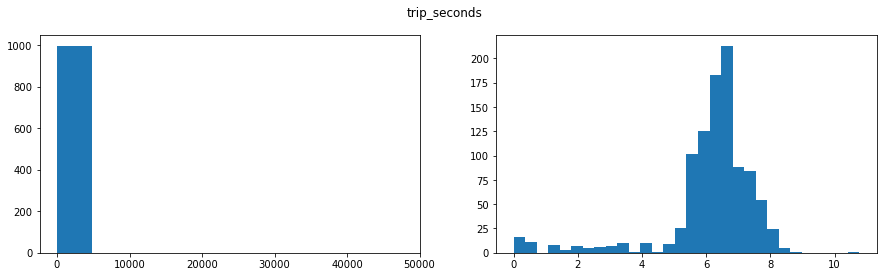

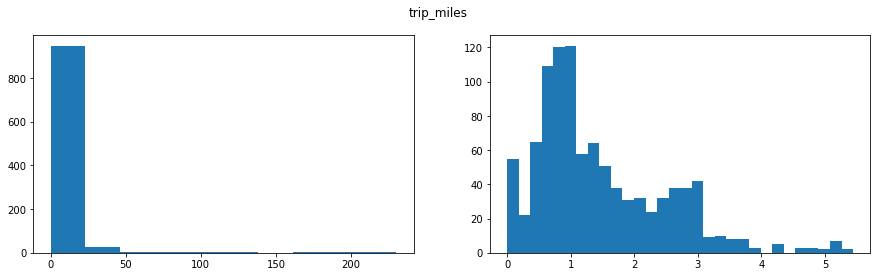

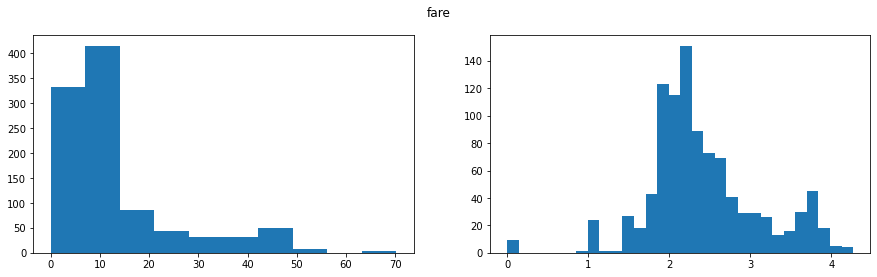

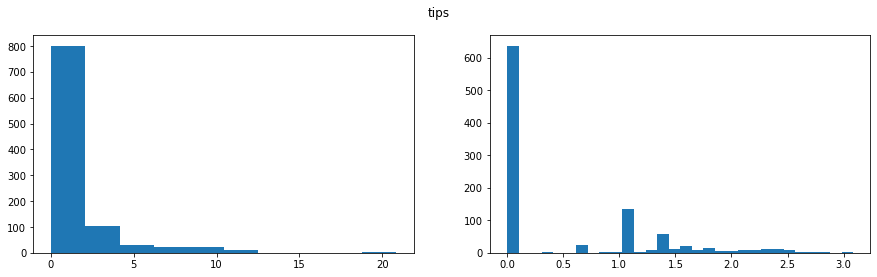

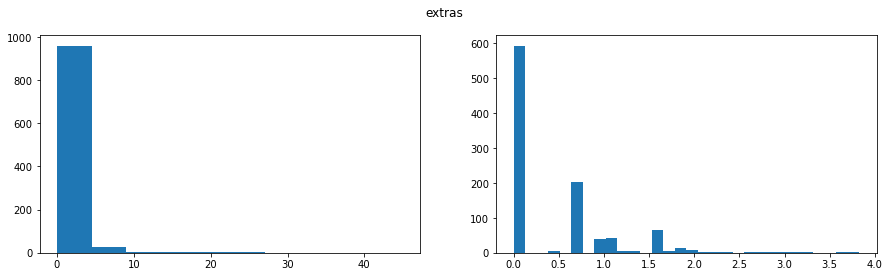

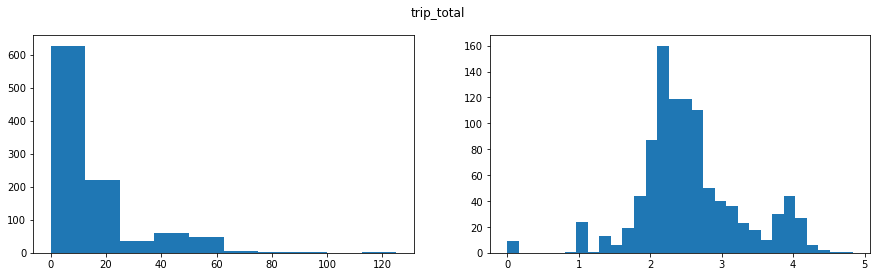

In [23]:
for col in num_df:
    column="{}".format(col)
    x= num_df[column]
    log_x=np.log(x+1)
    f, ax=plt.subplots(1,2, figsize=(15,4))
    ax[0].hist(x, bins=10)
    plt.suptitle(column)
    ax[1].hist(log_x, bins=30);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='trip_total'>

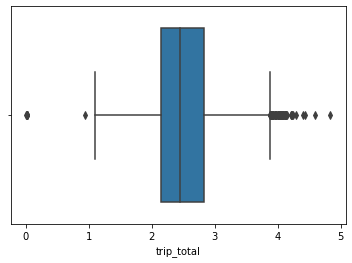

In [25]:
sns.boxplot(log_x)

In [26]:
np.exp(log_x.mean())

12.840557592238042

<AxesSubplot:xlabel='trip_seconds', ylabel='trip_miles'>

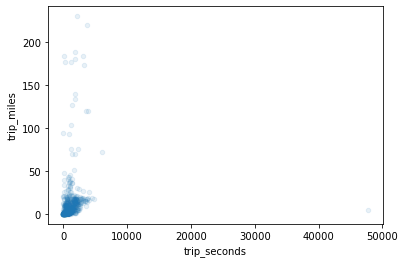

In [27]:
num_df.plot(kind='scatter', x='trip_seconds', y='trip_miles', alpha=0.1)

In [28]:
x='trip_seconds'
y='trip_miles'
num_df[[x,y]].corr()

,trip_seconds,trip_miles
trip_seconds,1.00000,0.15766
trip_miles,0.15766,1.00000


<AxesSubplot:xlabel='trip_seconds', ylabel='trip_miles'>

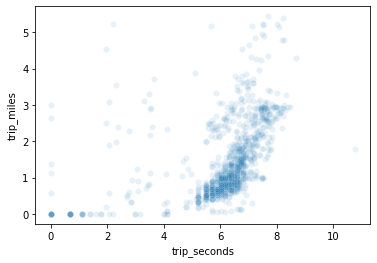

In [29]:
log_x = np.log(num_df[x] +1)
log_y = np.log(num_df[y] +1)
sns.scatterplot(x=log_x, y=log_y, alpha=0.1)

In [30]:
log_num_df = pd.DataFrame(
    columns=[x,y]
)

log_num_df[x] = log_x
log_num_df[y] = log_y

log_num_df.corr()

,trip_seconds,trip_miles
trip_seconds,1.00000,0.44725
trip_miles,0.44725,1.00000


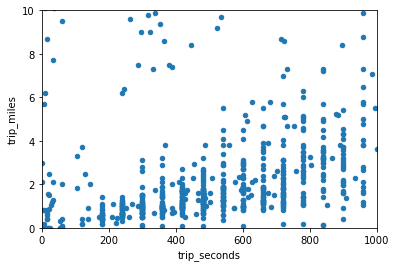

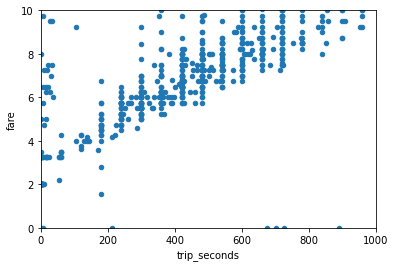

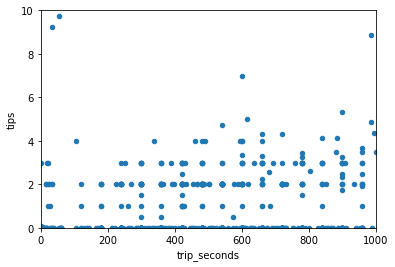

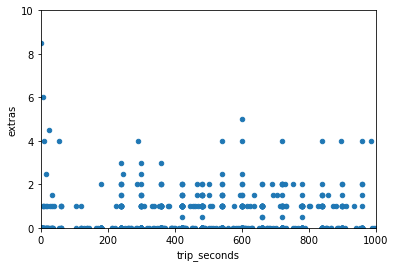

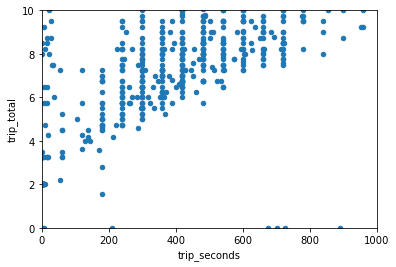

In [35]:
for col in num_df:
    column="{}".format(col)
    if column!='trip_seconds':
        num_df.plot(kind='scatter', x='trip_seconds', y=column)#, alpha=0.1)
        plt.xlim(0,1000)
        plt.ylim(0,10)

Many Dimensions

-Scatter Matrix

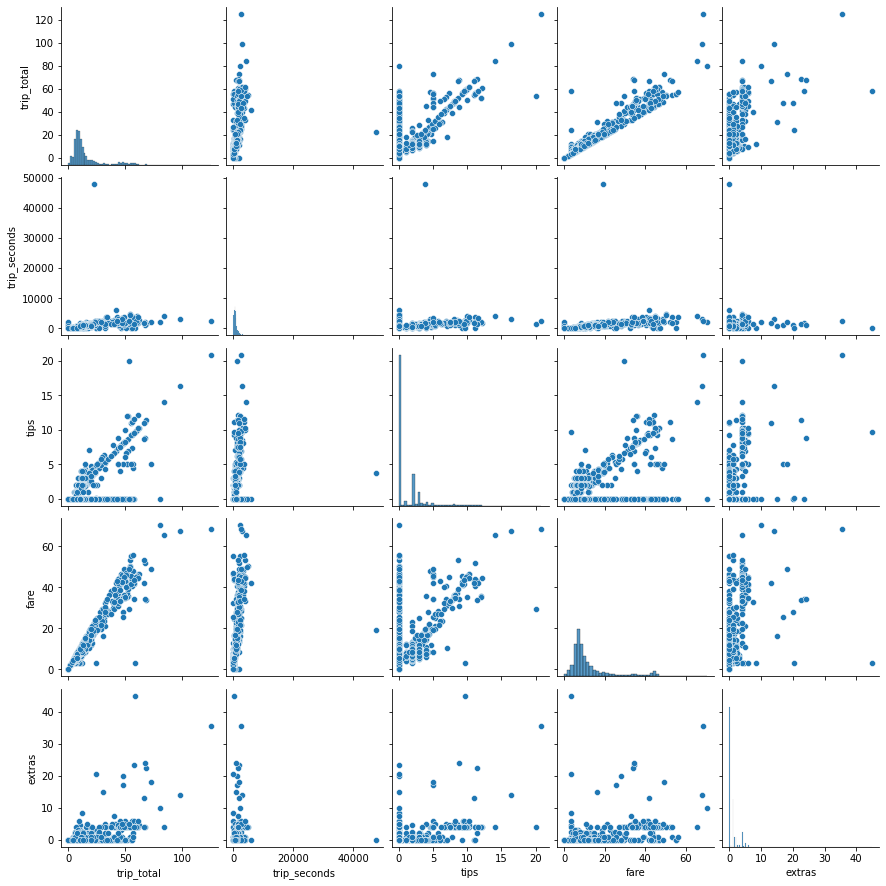

In [36]:
cols= ['trip_total', 'trip_seconds', 'tips', 'fare', 'extras']
sns.pairplot(data=num_df[cols])

<AxesSubplot:>

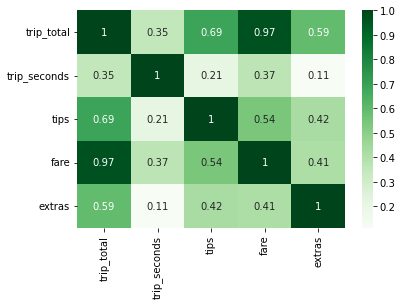

In [37]:
correlations = num_df[cols].corr()

sns.heatmap(correlations, cmap='Greens', annot=True)

Ejercicio 3 hacer esta misma tabla en escala logaritmica (transformación en logaritmo)

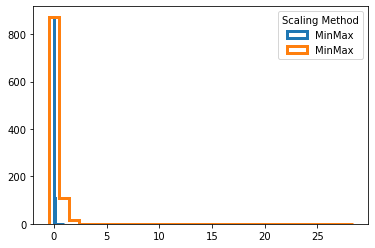

In [38]:

x = num_df['trip_seconds']
x_min = x.min()
x_max = x.max()

x_mean = x.mean()
x_std = x.std()

x_minmaxscaled = (x-x_min) / (x_max - x_min) #minmax scaler
x_std_scaled = (x -x_mean)/x_std

#plt.hist(x_scaled, bins=30);
plt.hist(x_minmaxscaled, bins=30, label='MinMax', histtype='step', lw=3)
plt.hist(x_std_scaled, bins=30, label='MinMax', histtype='step', lw=3);

plt.legend(title='Scaling Method')


In [39]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [40]:
minmax_scaler = MinMaxScaler().fit(num_df[cols])
data_min_max_scaled = minmax_scaler.transform(num_df[cols])

print(data_min_max_scaled)

[[3.79696243e-02 1.88679245e-04 0.00000000e+00 6.76156584e-02
  0.00000000e+00]
 [7.19424460e-02 1.22222222e-02 0.00000000e+00 1.28113879e-01
  0.00000000e+00]
 [8.19344524e-02 1.73375262e-02 0.00000000e+00 1.31672598e-01
  2.22222222e-02]
 ...
 [7.99360512e-02 1.88679245e-02 0.00000000e+00 1.42348754e-01
  0.00000000e+00]
 [1.05915268e-01 2.01257862e-02 4.79616307e-02 1.67259786e-01
  0.00000000e+00]
 [1.62270184e-01 1.38364780e-02 1.58273381e-01 2.34875445e-01
  0.00000000e+00]]


In [41]:
num_df_minmax_scaled = pd.DataFrame(
    columns = num_df[cols].columns,
    data = data_min_max_scaled
)
num_df_minmax_scaled.head()

,trip_total,trip_seconds,tips,fare,extras
0,0.037970,0.000189,0.0,0.067616,0.000000
1,0.071942,0.012222,0.0,0.128114,0.000000
2,0.081934,0.017338,0.0,0.131673,0.022222
3,0.107914,0.022558,0.0,0.177936,0.022222
4,0.085931,0.000147,0.0,0.138790,0.022222


In [ ]:
Ejercicio estudio de correlaciones con minmax sclaer y Standar Scaler